pandas采用了大量的NumPy编码风格，但二者最大的不同是pandas是专门
为处理表格和混杂数据设计的。而NumPy更适合处理统一的数值数组数据。

In [2]:
import pandas as pd
from pandas import Series, DataFrame

In [3]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

- Series的字符串表现形式为：索引在左边，值在右边。由于我们没有为数据指定索
引，于是会自动创建一个0到N-1（N为数据的长度）的整数型索引。你可以通过
Series 的values和index属性获取其数组表示形式和索引对象

In [4]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [6]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [7]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
print(obj2)
obj2.index

d    4
b    7
a   -5
c    3
dtype: int64


Index(['d', 'b', 'a', 'c'], dtype='object')

In [8]:
print(obj2['a'])
obj2['d'] = 6
print(obj2[['c', 'a', 'd']])

-5
c    3
a   -5
d    6
dtype: int64


In [9]:
"b" in obj2

True

- 字典转为Series

In [11]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64

- 传入排好序的字典的键以改变顺序

In [12]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

在这个例子中，sdata中跟states索引相匹配的那3个值会被找出来并放到相应的位
置上，但由于"California"所对应的sdata值找不到，所以其结果就为
NaN（即“非数字”（not a number），在pandas中，它用于表示缺失或NA
值）。因为‘Utah’不在states中，它被从结果中除去。
- 我将使用缺失（missing）或NA表示缺失数据。
- pandas的isnull和notnull函数可
用于检测缺失数据：

In [14]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [15]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

- Series也有类似的实例方法

In [16]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [17]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

- Series的索引可以通过赋值的方式就地修改：

In [18]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

## DataFrame
DataFrame是一个表格型的数据结构，它含有一组有序的列，每列可以是不同的
值类型（数值、字符串、布尔值等）。DataFrame既有行索引也有列索引，它可
以被看做由Series组成的字典（共用同一个索引）。DataFrame中的数据是以一个
或多个二维块存放的（而不是列表、字典或别的一维数据结构）

In [20]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                             'five', 'six'])
frame2
# 如果传入的列在数据中找不到，就会在结果中产生缺失值：

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [22]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

- 通过类似字典标记的方式或属性的方式，可以将DataFrame的列获取为一个
Series

In [23]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [24]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

In [25]:
# 根据索引选取行
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

- 将列表或数组赋值给某个列时，其长度必须跟DataFrame的长度相匹配。如果赋
值的是一个Series，就会精确匹配DataFrame的索引，所有的空位都将被填上缺失
值

In [26]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


为不存在的列赋值会创建出一个新列。关键字del用于删除列。
作为del的例子，我先添加一个新的布尔值的列，state是否为'Ohio'

In [27]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


In [28]:
del frame2['eastern']

In [29]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

注意：通过索引方式返回的列只是相应数据的视图而已，并不是副本。因此，
对返回的Series所做的任何就地修改全都会反映到源DataFrame上。通过Series
的copy方法即可指定复制列

- 如果嵌套字典传给DataFrame，pandas就会被解释为：外层字典的键作为列，内
层键则作为行索引：

In [30]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


- 内层字典的键会被合并、排序以形成最终的索引。如果明确指定了索引，则不会这
样

In [33]:
pd.DataFrame(pop, index=Series([2001, 2002, 2003]))

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


- 如果设置了DataFrame的index和columns的name属性，则这些信息也会被显示
出来：

In [34]:
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [35]:
frame3.values

array([[nan, 1.5],
       [2.4, 1.7],
       [2.9, 3.6]])

In [37]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

## 索引对象
pandas的索引对象负责管理轴标签和其他元数据（比如轴名称等）。构建Series
或DataFrame时，所用到的任何数组或其他序列的标签都会被转换成一个Index

In [38]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

- index对象是不可变的，因此用户不能对其进行修改：

In [39]:
index[1] = 'd'

TypeError: Index does not support mutable operations

- 不可变可以使Index对象在多个数据结构之间安全共享：

In [41]:
import numpy as np

labels = pd.Index(np.arange(3))
print(labels)
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
print(obj2)
obj2.index is labels

Int64Index([0, 1, 2], dtype='int64')
0    1.5
1   -2.5
2    0.0
dtype: float64


True

### 重新索引

In [42]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [43]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

- 对于时间序列这样的有序数据，重新索引时可能需要做一些插值处理。method选
项即可达到此目的，例如，使用ffill可以实现前向值填充：

In [44]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [48]:
obj3.reindex(np.arange(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [49]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

- 多维数组的reindex

In [50]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [51]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [52]:
frame22 = frame.reindex(['a', 'b', 'c', 'd'],axis=1)
frame22

,a,b,c,d
a,NaN,NaN,NaN,NaN
c,NaN,NaN,NaN,NaN
d,NaN,NaN,NaN,NaN


In [53]:
frame22.index

Index(['a', 'c', 'd'], dtype='object')

- 列可以用columns关键字重新索引：

In [54]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [56]:
help(frame.reindex)

Help on method reindex in module pandas.core.frame:

reindex(labels=None, index=None, columns=None, axis=None, method=None, copy=True, level=None, fill_value=nan, limit=None, tolerance=None) method of pandas.core.frame.DataFrame instance
    Conform DataFrame to new index with optional filling logic, placing
    NA/NaN in locations having no value in the previous index. A new object
    is produced unless the new index is equivalent to the current one and
    copy=False
    
    Parameters
    ----------
    labels : array-like, optional
        New labels / index to conform the axis specified by 'axis' to.
    index, columns : array-like, optional (should be specified using keywords)
        New labels / index to conform to. Preferably an Index object to
        avoid duplicating data
    axis : int or str, optional
        Axis to target. Can be either the axis name ('index', 'columns')
        or number (0, 1).
    method : {None, 'backfill'/'bfill', 'pad'/'ffill', 'nearest'}, optio

In [57]:
dir(frame.reindex)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__func__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__wrapped__']

## 丢弃指定轴上的项
丢弃某条轴上的一个或多个项很简单，只要有一个索引数组或列表即可。由于需要
执行一些数据整理和集合逻辑，所以drop方法返回的是一个在指定轴上删除了指
定值的新对象

In [6]:
import pandas as pd
import numpy as np
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [7]:
new_obj = obj.drop('c')

In [8]:
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [9]:
obj.drop(['d','c'])

a    0.0
b    1.0
e    4.0
dtype: float64

- 对于DataFrame，可以删除任意轴上的索引值

In [10]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [11]:
data.drop(['Colorado','Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


- 通过传递axis=1或axis='columns'可以删除列的值：

In [12]:
data.drop('two',axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [13]:
data.drop('two',axis='columns')

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


- 通过inplace参数修改Series或DataFrame的大小或形状，可以就地修改对
象，不会返回新的对象

In [14]:
obj.drop('c',inplace=True)

In [15]:
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

### 索引、选取和过滤

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [3]:
print(obj[1:4])
print(type(obj[1:4]))

b    1.0
c    2.0
d    3.0
dtype: float64
<class 'pandas.core.series.Series'>


In [4]:
print(obj[['b', 'a', 'd']])
print(type(obj[['b', 'a', 'd']]))

b    1.0
a    0.0
d    3.0
dtype: float64
<class 'pandas.core.series.Series'>


In [5]:
obj[[1,3]]

b    1.0
d    3.0
dtype: float64

In [6]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

- 利用标签的切片运算与普通的Python切片运算不同，其末端是包含的：

- 用切片可以对Series的相应部分进行设置：

In [7]:
obj['b':'c'] = 5
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

In [11]:
obj[1:3] = 7
obj

a    0.0
b    7.0
c    7.0
d    6.0
dtype: float64

In [13]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

print(data[['three', 'one']])
print(type(data[['three', 'one']]))

          three  one
Ohio          2    0
Colorado      6    4
Utah         10    8
New York     14   12
<class 'pandas.core.frame.DataFrame'>


In [14]:
type(data['two'])

pandas.core.series.Series

### 用loc和iloc进行选取

- 对于DataFrame的行的标签索引，我引入了特殊的标签运算符loc和iloc。使用轴标签（loc）或整数索引（iloc），从
DataFrame选择行和列的子集。

In [15]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int32

- 这两个索引函数也适用于一个标签或多个标签的切片：

In [16]:
data.loc[:'Utah', 'two']

Ohio        1
Colorado    5
Utah        9
Name: two, dtype: int32

In [17]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,4,5,6
Utah,8,9,10
New York,12,13,14


In [18]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


### 整数索引
处理整数索引的pandas对象常常难住新手，因为它与Python内置的列表和元组的
索引语法不同。

In [19]:
ser = pd.Series(np.arange(3.))
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [22]:
ser[2]
ser[-1] 

KeyError: -1

- 索引为非整数，直接使用整数索引不会产生歧义

In [23]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])
ser2[-1]

2.0

#### 为了进行统一，如果轴索引含有整数，数据选取总会使用标签。为了更准确，请使用loc（标签）或iloc（整数）：

In [24]:
print(ser[:1])      #整数索引
print(ser.loc[:1])  #标签索引
print(ser.iloc[:1]) #整数索引

0    0.0
dtype: float64
0    0.0
1    1.0
dtype: float64
0    0.0
dtype: float64


## 算术运算和数据对齐
pandas最重要的一个功能是，它可以对不同索引的对象进行算术运算。在将对象
相加时，如果存在不同的索引对，则结果的索引就是该索引对的并集。对于有数据
库经验的用户，这就像在索引标签上进行自动外连接。

In [25]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [26]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [27]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


- 如果DataFrame对象相加，没有共用的列或行标签，结果都会是空：

In [28]:
df1 = pd.DataFrame({'A': [1, 2]})
df2 = pd.DataFrame({'B': [3, 4]})

df1 - df2

,A,B
0,NaN,NaN
1,NaN,NaN


### 在算术方法中填充值
在对不同索引的对象进行算术运算时，你可能希望当一个对象中某个轴标签在另一
个对象中找不到时填充一个特殊值（比如0）

In [29]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                   columns=list('abcde'))
df2.loc[1, 'b'] = np.nan
print(df1)
df2

     a    b     c     d
0  0.0  1.0   2.0   3.0
1  4.0  5.0   6.0   7.0
2  8.0  9.0  10.0  11.0


,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [30]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


- 使用df1的add方法，传入df2以及一个fill_value参数

In [31]:
df1.add(df2,fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


- Series和DataFrame的算术方法。它们每个都有一个副本，以字母r开
头，它会翻转参数。因此这两个语句是等价的

In [32]:
df1.div(2)

,a,b,c,d
0,0.0,0.5,1.0,1.5
1,2.0,2.5,3.0,3.5
2,4.0,4.5,5.0,5.5


In [33]:
df1.rdiv(2)

,a,b,c,d
0,inf,2.000000,1.000000,0.666667
1,0.500000,0.400000,0.333333,0.285714
2,0.250000,0.222222,0.200000,0.181818


- 与此类似，在对Series或DataFrame重新索引时，也可以指定一个填充值

In [35]:
df1.reindex(columns=df2.columns)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,NaN
1,4.0,5.0,6.0,7.0,NaN
2,8.0,9.0,10.0,11.0,NaN


In [36]:
df1.reindex(columns=df2.columns,fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


## DataFrame和Series之间的运算
跟不同维度的NumPy数组一样，DataFrame和Series之间算术运算也是有明确规
定的。先来看一个具有启发性的例子，计算一个二维数组与其某行之间的差

In [38]:
arr = np.arange(12.).reshape((3, 4))
print(arr)
print(arr[0])
arr - arr[0]

[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]
[0. 1. 2. 3.]


array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

当我们从arr减去arr[0]，每一行都会执行这个操作。这就叫做广播
（broadcasting），

- 如果你希望匹配行且在列上广播，则必须使用算术运算方法。例如：

In [39]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series2 = pd.Series(range(3), index=['b', 'e', 'f'])
series3 = frame['d']
frame.sub(series3, axis='index')

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


# 函数应用和映射
### NumPy的ufuncs（元素级数组方法）也可用于操作pandas对象

In [40]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.830050,1.039133,1.131288
Ohio,0.391767,-0.842655,-0.396417
Texas,-1.648192,-0.684133,-0.794663
Oregon,-0.149890,1.924307,0.861491


In [41]:
np.abs(frame)

,b,d,e
Utah,0.830050,1.039133,1.131288
Ohio,0.391767,0.842655,0.396417
Texas,1.648192,0.684133,0.794663
Oregon,0.149890,1.924307,0.861491


- 另一个常见的操作是，将函数应用到由各列或行所形成的一维数组上。
DataFrame的apply方法即可实现此功能

In [44]:
f = lambda x:x.max() - x.min()
frame.apply(f)

b    2.478242
d    2.766962
e    1.925951
dtype: float64

In [45]:
frame.apply(f,axis=1)

Utah      0.301238
Ohio      1.234422
Texas     0.964059
Oregon    2.074197
dtype: float64

- 许多最为常见的数组统计功能都被实现成DataFrame的方法（如sum和mean），
因此无需使用apply方法。
- 传递到apply的函数不是必须返回一个标量，还可以返回由多个值组成的Series

In [46]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f)

,b,d,e
min,-1.648192,-0.842655,-0.794663
max,0.830050,1.924307,1.131288


- 元素级的Python函数也是可以用的。假如你想得到frame中各个浮点值的格式化
字符串，使用applymap即可：

In [48]:
format = lambda x: '%.2f' % x
frame.applymap(format)

,b,d,e
Utah,0.83,1.04,1.13
Ohio,0.39,-0.84,-0.40
Texas,-1.65,-0.68,-0.79
Oregon,-0.15,1.92,0.86


- 之所以叫做applymap，是因为Series有一个用于应用元素级函数的map方法：

In [50]:
frame['e'].map(format)

Utah       1.13
Ohio      -0.40
Texas     -0.79
Oregon     0.86
Name: e, dtype: object

# 排序和排名
- 根据条件对数据集排序（sorting）也是一种重要的内置运算。
- 要对行或列索引进
行排序（按字典顺序），可使用sort_index方法，它将返回一个已排序的新对象

In [52]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj

d    0
a    1
b    2
c    3
dtype: int64

In [53]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

- 对于DataFrame，则可以根据任意一个轴上的索引进行排序

In [54]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [55]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [56]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


- 数据默认是按升序排序的，但也可以降序排序：

In [58]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [59]:
# 按值排序
obj = pd.Series([4, 7, -3, 2])
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

- 在排序时，任何缺失值默认都会被放到Series的末尾

In [60]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

- 当排序一个DataFrame时，你可能希望根据一个或多个列中的值进行排序。将一
个或多个列的名字传递给sort_values的by选项即可达到该目的：

In [62]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

,a,b
0,0,4
1,1,7
2,0,-3
3,1,2


In [63]:
frame.sort_values(by='b')

,a,b
2,0,-3
3,1,2
0,0,4
1,1,7


In [64]:
frame.sort_values(by = ['a','b'])

,a,b
2,0,-3
0,0,4
3,1,2
1,1,7


-  排名会从1开始一直到数组中有效数据的数量。接下来介绍Series和DataFrame的
rank方法。默认情况下，rank是通过“为各组分配一个平均排名”的方式破坏平
级关系的

In [67]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

- 也可以根据值在原数据中出现的顺序给出排名：

In [68]:
# 还是针对重复数值的
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

- 也可以按降序进行排名

In [69]:
obj.rank(ascending=False,method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

## 带有重复标签的轴索引
直到目前为止，我所介绍的所有范例都有着唯一的轴标签（索引值）。虽然许多
pandas函数（如reindex）都要求标签唯一，但这并不是强制性的。我们来看看下
面这个简单的带有重复索引值的Series

In [70]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

- 索引的is_unique属性可以告诉你它的值是否是唯一的

In [71]:
obj.index.is_unique

False

- 索引的is_unique属性可以告诉你它的值是否是唯一的

In [72]:
obj['a']

a    0
a    1
dtype: int64

In [73]:
obj['c']

4

- 这样会使代码变复杂，因为索引的输出类型会根据标签是否有重复发生变化。
对DataFrame的行进行索引时也是如此

In [74]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
print(df)
df.loc['b']

          0         1         2
a -0.121190  0.584391  1.044701
a -1.102503  1.342489 -1.155667
b -0.563828  0.779217 -1.318406
b  0.378926  0.273247 -0.810333


,0,1,2
b,-0.563828,0.779217,-1.318406
b,0.378926,0.273247,-0.810333


# 5.3 汇总和计算描述统计
- pandas对象拥有一组常用的数学和统计方法。它们大部分都属于约简和汇总统
计，用于从Series中提取单个值（如sum或mean）或从DataFrame的行或列中提
取一个Series。
- 跟对应的NumPy数组方法相比，它们都是基于没有缺失数据的假
设而构建的。看一个简单的DataFrame

In [75]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [77]:
df.sum()

one    9.25
two   -5.80
dtype: float64

- NA值会自动被排除，除非整个切片（这里指的是行或列）都是NA。通过skipna
选项可以禁用该功能

In [78]:
df.mean(axis='columns')

a    1.400
b    1.300
c      NaN
d   -0.275
dtype: float64

In [79]:
df.mean(axis='columns',skipna=False)
# 使用skipna为False后，只有series里有na项，则返回na。

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

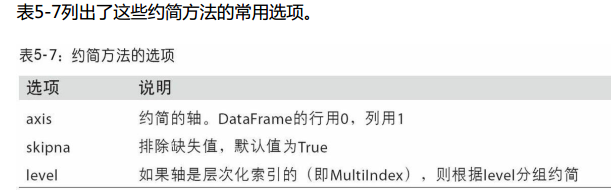

- 有些方法（如idxmin和idxmax）返回的是间接统计（比如达到最小值或最大值的
索引）

In [81]:
df.idxmax()

one    b
two    d
dtype: object

- 另一些方法则是累计型的：

In [82]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


- 还有一种方法，它既不是约简型也不是累计型。describe就是一个例子，它用于一
次性产生多个汇总统计

In [83]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


- 对于非数值型数据，describe会产生另外一种汇总统计

In [84]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

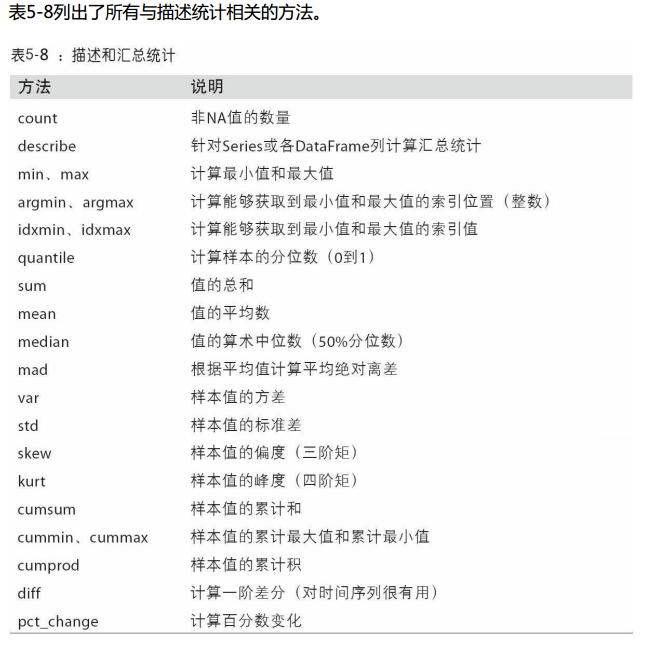

## 相关系数与协方差
- 有些汇总统计（如相关系数和协方差）是通过参数对计算出来的。我们来看几个
DataFrame，它们的数据来自Yahoo!Finance的股票价格和成交量，使用的是
pandas-datareader包（可以用conda或pip安装）

In [88]:
import pandas_datareader.data as web
all_data = {ticker : web.get_data_yahoo(ticker) for ticker in ["AAPL",'IBM','MSFT','GOOG']}

In [90]:
price = pd.DataFrame({ticker:data['Adj Close']
                     for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker:data['Volume'] 
                      for ticker, data in all_data.items()})

In [92]:
price.head()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2009-12-31,20.073631,307.986847,99.303009,24.241983
2010-01-04,20.386072,311.349976,100.478867,24.615801
2010-01-05,20.421322,309.978882,99.265091,24.623755
2010-01-06,20.096491,302.164703,98.620255,24.472631
2010-01-07,20.059338,295.130463,98.278870,24.218124


In [93]:
returns = price.pct_change() #pct_change计算增长率
returns.head()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2009-12-31,NaN,NaN,NaN,NaN
2010-01-04,0.015565,0.010920,0.011841,0.015420
2010-01-05,0.001729,-0.004404,-0.012080,0.000323
2010-01-06,-0.015906,-0.025209,-0.006496,-0.006137
2010-01-07,-0.001849,-0.023279,-0.003462,-0.010400


- Series的corr方法用于计算两个Series中重叠的、非NA的、按索引对齐的值的相关
系数。
- 与此类似，cov用于计算协方差

In [95]:
returns['MSFT'].corr(returns['IBM'])


0.4866831097879075

In [96]:
returns['MSFT'].cov(returns['IBM'])

8.734718905795014e-05

因为MSTF是一个合理的Python属性，我们还可以用更简洁的语法选择列

In [97]:
returns.MSFT.corr(returns.IBM)

0.4866831097879075

- 另一方面，DataFrame的corr和cov方法将以DataFrame的形式分别返回完整的相
关系数或协方差矩阵

In [98]:
returns.corr()

,AAPL,GOOG,IBM,MSFT
AAPL,1.000000,0.457481,0.372080,0.450247
GOOG,0.457481,1.000000,0.408324,0.537512
IBM,0.372080,0.408324,1.000000,0.486683
MSFT,0.450247,0.537512,0.486683,1.000000


In [99]:
returns.cov()

,AAPL,GOOG,IBM,MSFT
AAPL,0.000271,0.000116,0.000076,0.000108
GOOG,0.000116,0.000238,0.000078,0.000121
IBM,0.000076,0.000078,0.000153,0.000087
MSFT,0.000108,0.000121,0.000087,0.000211


- 利用DataFrame的corrwith方法，你可以计算其列或行跟另一个Series或
DataFrame之间的相关系数。传入一个Series将会返回一个相关系数值Series（针对各列进行计算）

In [100]:
returns.corrwith(returns.IBM)

AAPL    0.372080
GOOG    0.408324
IBM     1.000000
MSFT    0.486683
dtype: float64

- 传入一个DataFrame则会计算按列名配对的相关系数。这里，我计算百分比变化
与成交量的相关系数

In [101]:
returns.corrwith(volume)

AAPL   -0.059732
GOOG   -0.017377
IBM    -0.153277
MSFT   -0.089666
dtype: float64

## 唯一值、值计数以及成员资格

In [102]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

- 第一个函数是unique，它可以得到Series中的唯一值数组：

In [103]:
obj.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

- 返回的唯一值是未排序的，如果需要的话，可以对结果再次进行排序
（uniques.sort()）。
- 相似的，value_counts用于计算一个Series中各值出现的频
率：

In [105]:
obj.value_counts()

a    3
c    3
b    2
d    1
dtype: int64

为了便于查看，结果Series是按值频率降序排列的。value_counts还是一个顶级
pandas方法，可用于任何数组或序列

In [106]:
pd.value_counts(obj.values,sort=False)

c    3
d    1
a    3
b    2
dtype: int64

- isin用于判断矢量化集合的成员资格，可用于过滤Series中或DataFrame列中数据
的子集

In [107]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [108]:
mask = obj.isin(['b','c'])

In [109]:
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [110]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

- 与isin类似的是Index.get_indexer方法，它可以给你一个索引数组，从可能包含重
复值的数组到另一个不同值的数组：

In [111]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])
unique_vals = pd.Series(['c', 'b', 'a'])

In [112]:
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2], dtype=int64)

In [115]:
# unique_vals.index.get_indexer(to_match)
unique_vals.index

RangeIndex(start=0, stop=3, step=1)

In [116]:
pd.Index(unique_vals)

Index(['c', 'b', 'a'], dtype='object')

In [117]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a','d'])
unique_vals = pd.Series(['c', 'b', 'a'])
pd.Index(unique_vals).get_indexer(to_match)
# 匹配不成功的返回-1

array([ 0,  2,  1,  1,  0,  2, -1], dtype=int64)

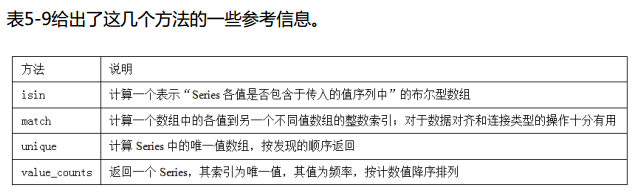

- 得到DataFrame中多个相关列的一张柱状图

In [118]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [119]:
data.apply(pd.value_counts)

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


In [121]:
# value_counts()是一种查看表格某列中有多少个不同值的快捷方法，并计算每个不同值有在该列中有多少重复值
result = data.apply(pd.value_counts).fillna(0) #
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0
